# Introduction
The dataset speeddating was used and the idea is to predict the outcome of the dates.

In [2]:
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('SpeedDatingData.csv')
df.head(10)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
5,1,1.0,0,1,1,1,10,7,NaN,6,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
6,1,1.0,0,1,1,1,10,7,NaN,1,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
7,1,1.0,0,1,1,1,10,7,NaN,2,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
8,1,1.0,0,1,1,1,10,7,NaN,8,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
9,1,1.0,0,1,1,1,10,7,NaN,9,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 195 columns):
 #    Column    Dtype  
---   ------    -----  
 0    iid       int64  
 1    id        float64
 2    gender    int64  
 3    idg       int64  
 4    condtn    int64  
 5    wave      int64  
 6    round     int64  
 7    position  int64  
 8    positin1  float64
 9    order     int64  
 10   partner   int64  
 11   pid       float64
 12   match     int64  
 13   int_corr  float64
 14   samerace  int64  
 15   age_o     float64
 16   race_o    float64
 17   pf_o_att  float64
 18   pf_o_sin  float64
 19   pf_o_int  float64
 20   pf_o_fun  float64
 21   pf_o_amb  float64
 22   pf_o_sha  float64
 23   dec_o     int64  
 24   attr_o    float64
 25   sinc_o    float64
 26   intel_o   float64
 27   fun_o     float64
 28   amb_o     float64
 29   shar_o    float64
 30   like_o    float64
 31   prob_o    float64
 32   met_o     float64
 33   age       float64
 34   field     object 
 35 

First the dataset was inspected and looked at to understand what everything is. The dataset has 195 columns and 8378 rows.

In [5]:
df['dec_o'].value_counts()

0    4863
1    3515
Name: dec_o, dtype: int64

There seem to be more no matches then yes matches. But the difference is not that big. Calculating the yes matches are however more important than the no matches. Since for dating it is more important to know if there is a match.

In [6]:
df = df[["dec_o","gender", "age_o", "attr3_3", "sinc3_3", "intel3_3", "fun3_3", "amb3_3"]]

In the end the df_sel was made. Gender and age were chosen, since those are interesting to look at if they have an influence. The other 5 were chosen since they seem to be filled in a lot.
Dec_o was chosen since that one needs to be calculated

In [7]:
df.dropna()

,dec_o,gender,age_o,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3
0,0,0,27.0,5.0,7.0,7.0,7.0,7.0
1,0,0,22.0,5.0,7.0,7.0,7.0,7.0
2,1,0,22.0,5.0,7.0,7.0,7.0,7.0
3,1,0,23.0,5.0,7.0,7.0,7.0,7.0
4,1,0,24.0,5.0,7.0,7.0,7.0,7.0
...,...,...,...,...,...,...,...,...
8373,1,1,26.0,8.0,5.0,7.0,6.0,7.0
8374,0,1,24.0,8.0,5.0,7.0,6.0,7.0
8375,0,1,29.0,8.0,5.0,7.0,6.0,7.0
8376,1,1,22.0,8.0,5.0,7.0,6.0,7.0


All the na's were deleted to make the dataset usable. There are still 3937 rows which is enough.

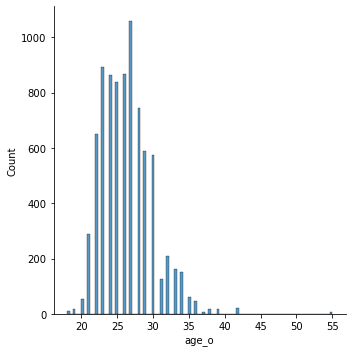

In [8]:
sns.displot(x="age_o", kde=False, data=df)

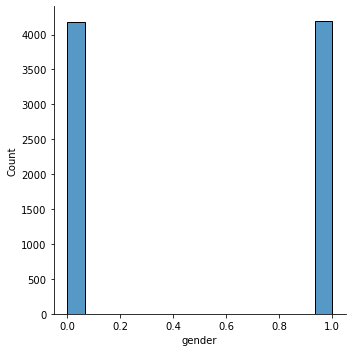

In [9]:
sns.displot(x="gender", kde=False, data=df)

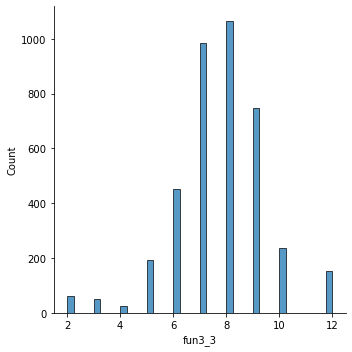

In [10]:
sns.displot(x="fun3_3", kde=False, data=df)

The data seems to be quite normal. No easy errors can be spotted.

In [9]:
corr = df.corr()
corr

,dec_o,gender,age_o,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3
dec_o,1.000000,-0.111550,0.015128,0.073356,-0.022781,0.018058,0.090432,0.053390
gender,-0.111550,1.000000,-0.072408,-0.125433,-0.159709,0.023925,-0.144642,-0.058300
age_o,0.015128,-0.072408,1.000000,0.010709,0.040454,0.029877,0.010757,0.012243
attr3_3,0.073356,-0.125433,0.010709,1.000000,0.389508,0.518050,0.581323,0.431963
sinc3_3,-0.022781,-0.159709,0.040454,0.389508,1.000000,0.400942,0.391919,0.357387
intel3_3,0.018058,0.023925,0.029877,0.518050,0.400942,1.000000,0.443965,0.521364
fun3_3,0.090432,-0.144642,0.010757,0.581323,0.391919,0.443965,1.000000,0.533767
amb3_3,0.053390,-0.058300,0.012243,0.431963,0.357387,0.521364,0.533767,1.000000


A correlation table was made to check the correlations. There are a few high correlations, especially with amb3_3. All the 3_3 things seem to have a higher correlation with each other as well. The dec, gender and age have quite low correlations.

In [12]:
import pandas as pd
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(df)

,dec_o,gender,age_o,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3
0,0.0,0.0,27.0,5.0,7.0,7.0,7.0,7.0
1,0.0,0.0,22.0,5.0,7.0,7.0,7.0,7.0
2,1.0,0.0,22.0,5.0,7.0,7.0,7.0,7.0
3,1.0,0.0,23.0,5.0,7.0,7.0,7.0,7.0
4,1.0,0.0,24.0,5.0,7.0,7.0,7.0,7.0
...,...,...,...,...,...,...,...,...
8373,1.0,1.0,26.0,8.0,5.0,7.0,6.0,7.0
8374,0.0,1.0,24.0,8.0,5.0,7.0,6.0,7.0
8375,0.0,1.0,29.0,8.0,5.0,7.0,6.0,7.0
8376,1.0,1.0,22.0,8.0,5.0,7.0,6.0,7.0


A def is used from the internet since I got the error: Input contains NaN, infinity or a value too large for dtype('float32').

I did remove the NaN's however

In [14]:
X = df[["gender", "age_o", "attr3_3", "sinc3_3", "intel3_3", "fun3_3", "amb3_3"]]
y = df['dec_o']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=34)

Random forest will be used now. A random forest consists of a lot of decision trees. These trees all make their own conlusion and the average of all these trees will be used in the end.

The X and y data are now defined and the train data and test data is also made.

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=34, n_estimators=100)
rf = rf.fit(X_train, y_train)

The train data has been fitted and 100 trees are used.

In [16]:
rf.score(X_test,y_test)

0.5862944162436549

The model was trained and the accuracy was calculated. It has an accuracy of 0.59, which is a little better than just doing a coin flip.

In [17]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, index=['no match (actual)', 'yes match (actual)'], columns = ['no match (pred)', 'yes match (pred)']) #label and make df
cm

,no match (pred),yes match (pred)
no match (actual),419,261
yes match (actual),228,274


A confusion matrix was created to show when it was calculated correctly and when not. However I didn't now for sure what the columns and rows should be called or if I labelled them the correct way.

However right there the model is not so good at predicting matches, since it still has almost 500 mistakes.

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.62      0.63       680
           1       0.51      0.55      0.53       502

    accuracy                           0.59      1182
   macro avg       0.58      0.58      0.58      1182
weighted avg       0.59      0.59      0.59      1182



A classification report is made to check the precision and recall.

The model is actually worse for the yes matches even though those are more important.

Precision for the matches is not that good, 49% of the suspected cases turn out to be wrong. The recall is also bad, since 45% of the matches is missed.

The precision and recall for the no matches however are a bit better.

# Conclusion:
very bad model, because it is just slightly better than a coin flip. It is especially bad at what is the most important. (the yes matches)